In [1]:
###this code produces Fig 2 of the manuscript
from os.path import join as pjoin
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib.ticker import FixedLocator
from os.path import join as pjoin
import numpy as np
import seaborn as sb
sb.__version__
##specify the directory where the figure file will be saved
#ddir = "/home/rigdzin/git_repos/farmers_GT/codes/graphs"
ddir = '.'

In [2]:
#help(pd.read_csv)
#help(econcost_fres_df.drop)
def y_indiv_field(d=None, ym=None, d50=None, y0=None):
    return y0+(d*ym)/(d + d50)
def fung_cost(d=None, f=None):
    return f*d
def d_opt(d50=None, ym=None, f=None):
    return -d50 + np.sqrt((d50*ym)/f)
def yield_econ(ym=None, d50=None, y0=None, f=None):
    return y0 + ym - np.sqrt(ym*d50*f)
def net_return_indiv_field(d=None, ym=None, d50=None, y0=None, f=None):
    return y_indiv_field(d=d, ym=ym, d50=d50, y0=y0) - fung_cost(d=d, f=f) 
d_ar = np.linspace(0.0, 2.0, 100)
###parameter values
ym = 0.55
d50 = 0.2
f1 = 0.05
f2 = 0.3
y0 = 0.4
y_ar = y_indiv_field(d=d_ar, ym=ym, d50=d50, y0=y0)
fung_cost1_ar = fung_cost(d=d_ar, f=f1)
fung_cost2_ar = fung_cost(d=d_ar, f=f2)
net_return1_ar = y_ar - fung_cost1_ar
net_return2_ar = y_ar - fung_cost2_ar
d_opt1 = d_opt(d50=d50, ym=ym, f=f1)
d_opt2 = d_opt(d50=d50, ym=ym, f=f2)
yield_econ1 = yield_econ(ym=ym, d50=d50, y0=y0, f=f1)
yield_econ2 = yield_econ(ym=ym, d50=d50, y0=y0, f=f2)
net_return_opt1 = net_return_indiv_field(d=d_opt1, ym=ym, d50=d50, y0=y0, f=f1)
net_return_opt2 = net_return_indiv_field(d=d_opt2, ym=ym, d50=d50, y0=y0, f=f2)

In [3]:
print("d_opt1", d_opt1)
print("d_opt2", d_opt2)

d_opt1 1.2832396974191327
d_opt2 0.4055300708194984


In [4]:
print("yield_econ1", yield_econ1)
print("yield_econ2", yield_econ2)

yield_econ1 0.8758380151290435
yield_econ2 0.7683409787541505


In [5]:
print("net_return_opt1", net_return_opt1)
print("net_return_opt2", net_return_opt2)

net_return_opt1 0.8116760302580869
net_return_opt2 0.646681957508301


In [6]:
y_econ_test1 = y_indiv_field(d=d_opt1, ym=ym, d50=d50, y0=y0)
print("y_econ_test1", y_econ_test1)

y_econ_test1 0.8758380151290435


In [7]:
y_econ_test2 = y_indiv_field(d=d_opt2, ym=ym, d50=d50, y0=y0)
print("y_econ_test2", y_econ_test2)

y_econ_test2 0.7683409787541505


In [8]:
def y_landsc(theta=None, beta=None, N=None, mu=None, epsilon=None, y=None):
    return -(((-2 + epsilon)*mu*(-1 + y) + np.sqrt((epsilon*mu + beta*N - beta*epsilon*N)**2.0 + 4.0*beta*(-1.0 + epsilon)*epsilon*mu*N*theta)*(-1 + y) - beta*(-1 + epsilon)*N*(1 + y))/
   (2*beta*(-1 + epsilon)*N))
theta_ar = np.linspace(0.0, 1.0, 100)
n_tot = 1000.0 #number of farms
R0 = 5.0
mu = 5.0
beta_w = R0*mu/n_tot
epsilon_w = 0.8
y = 0.5
f1_landsc = 0.1
f2_landsc = 0.6
y_landsc_ar = y_landsc(theta=theta_ar, beta=beta_w, N=n_tot, mu=mu, epsilon=epsilon_w, y=y)
fung_cost1_landsc_ar = fung_cost(d=theta_ar, f=f1_landsc)
fung_cost2_landsc_ar = fung_cost(d=theta_ar, f=f2_landsc)
net_return1_landsc_ar = y_landsc_ar - fung_cost1_landsc_ar
net_return2_landsc_ar = y_landsc_ar - fung_cost2_landsc_ar

In [9]:
beta_w

0.025

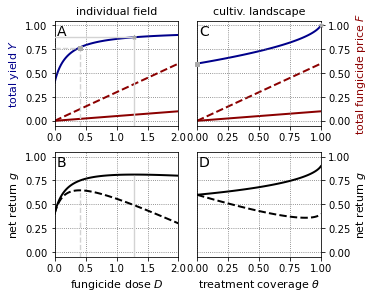

In [10]:
lw = 2.0
fs_axis_lab = 11
fs_label = 14.0
yaxmin = -0.05
yaxmax = 1.05
fig, ax = plt.subplots(2, 2, figsize=(5,4))

splt1 = ax[0,0]
#splt1.set_xlim(-0.05, 1.05)
splt1.set_xlim(0.0, 2.0)
splt1.set_ylim(yaxmin, yaxmax)
splt1.text(0.03, 0.9, "A", fontsize=fs_label)
#splt1.set_title("$R_0 = %s$; $\\varepsilon_r = %s$; $\\varepsilon_w = %s$" % (R0, effic_r, effic_w))
###opt net gain w/o res
splt1.set_ylabel("total yield $Y$", fontsize=fs_axis_lab) #, rotation='horizontal') #no resist"
#splt1.set_xlabel("fungicide dose $D$", fontsize=fs_axis_lab)
splt1.grid(b=True, which='major', color='#666666', linestyle=':')
splt1.scatter([d_opt1], [yield_econ1], s=20, marker='*', color='DarkGrey', zorder=7)
splt1.scatter([d_opt2], [yield_econ2], s=10, marker='s', color='DarkGrey', zorder=6)
splt1.plot(d_ar, y_ar, color='DarkBlue', lw=lw,  ls='-', label="$y$", zorder=1) #, marker='o')
splt1.plot(d_ar, fung_cost1_ar, color='DarkRed', lw=lw,  ls='-') #, label="fungic. cost")#, marker='o')
splt1.plot(d_ar, fung_cost2_ar, color='DarkRed', lw=lw,  ls='--') #, label="fungic. cost")#, marker='o')
splt1.axvline(x=d_opt1, ymin=0, ymax=yield_econ1/yaxmax, color='LightGrey', lw=0.7*lw, ls='-', zorder=2)
splt1.axvline(x=d_opt2, ymin=0, ymax=yield_econ2/yaxmax, color='LightGrey', lw=0.7*lw, ls='--', zorder=3)
splt1.axhline(y=yield_econ1, xmin=0.0, xmax=d_opt1/2.0, color='LightGrey', lw=0.7*lw, ls='-', zorder=4)
splt1.axhline(y=yield_econ2, xmin=0.0, xmax=d_opt2/2.0, color='LightGrey', lw=0.7*lw, ls='--', zorder=5)
#splt1.legend(loc='lower right')
splt1.set_title("individual field", fontsize=fs_axis_lab)
splt1.yaxis.label.set_color('DarkBlue')


splt2 = ax[1,0]
#splt1.set_xlim(-0.05, 1.05)
splt2.set_xlim(0.0, 2.0)
splt2.set_ylim(-0.05, 1.05)
splt2.text(0.03, 0.9, "B", fontsize=fs_label)
#splt1.set_title("$R_0 = %s$; $\\varepsilon_r = %s$; $\\varepsilon_w = %s$" % (R0, effic_r, effic_w))
###opt net gain w/o res
splt2.set_ylabel("net return $g$", fontsize=fs_axis_lab) #, rotation='horizontal') #no resist"
splt2.set_xlabel("fungicide dose $D$", fontsize=fs_axis_lab)
splt2.grid(b=True, which='major', color='#666666', linestyle=':')
splt2.plot(d_ar, net_return1_ar, color='k', lw=lw,  ls='-') #, label="$\\Delta y$") #, marker='o')
splt2.plot(d_ar, net_return2_ar, color='k', lw=lw,  ls='--') #label="fungic. cost")#, marker='o')
splt2.axvline(x=d_opt1, ymin=0.0, ymax=net_return_opt1/yaxmax, color='LightGrey', lw=0.7*lw, ls='-')
splt2.axvline(x=d_opt2, ymin=0.0, ymax=net_return_opt2/yaxmax, color='LightGrey', lw=0.7*lw, ls='--')
#splt2.scatter([d_opt1], [net_return_opt1], s=20, marker='*', color='DarkGrey', zorder=7)
#splt2.scatter([d_opt2], [net_return_opt2], s=10, marker='s', color='DarkGrey', zorder=6)
#splt2.axvline(x=d_opt2, color='LightGrey', lw=0.7*lw, ls='--')
#splt1.legend(loc='lower right')
        
splt3 = ax[0,1]
#splt1.set_xlim(-0.05, 1.05)
splt3.set_xlim(0.0, 1.0)
splt3.set_ylim(-0.05, 1.05)
splt3.text(0.015, 0.9, "C", fontsize=fs_label)
#splt1.set_title("$R_0 = %s$; $\\varepsilon_r = %s$; $\\varepsilon_w = %s$" % (R0, effic_r, effic_w))
###opt net gain w/o res
splt3.set_ylabel("total fungicide price $F$", fontsize=fs_axis_lab) #, rotation='horizontal') #no resist"
splt3.yaxis.label.set_color('DarkRed')
#splt3.set_xlabel("treatment coverage $\\theta$", fontsize=fs_axis_lab)
splt3.grid(b=True, which='major', color='#666666', linestyle=':')
splt3.plot(theta_ar, y_landsc_ar, color='DarkBlue', lw=lw,  ls='-', label="$\\Delta y$", zorder=1) #, marker='o')
splt3.plot(theta_ar, fung_cost1_landsc_ar, color='DarkRed', lw=lw,  ls='-', label="fungic. cost", zorder=1)#, marker='o')
splt3.plot(theta_ar, fung_cost2_landsc_ar, color='DarkRed', lw=lw,  ls='--', label="fungic. cost", zorder=1)#, marker='o')
splt3.scatter([0.0], [y_landsc_ar[0]], s=10, marker='s', color='DarkGrey', zorder=7, clip_on=False)
splt3.scatter([1.0], [y_landsc_ar[-1]], s=20, marker='*', color='DarkGrey', zorder=6, clip_on=False)
#splt3.axvline(x=d_opt1, color='LightGrey', lw=0.7*lw, ls='-')
#splt3.axvline(x=d_opt2, color='LightGrey', lw=0.7*lw, ls='--')
#splt1.legend(loc='lower right')
splt3.set_title("cultiv. landscape", fontsize=fs_axis_lab)
splt3.yaxis.set_label_position("right")
splt3.yaxis.tick_right()

splt4 = ax[1,1]
#splt1.set_xlim(-0.05, 1.05)
splt4.set_xlim(0.0, 1.0)
splt4.set_ylim(-0.05, 1.05)
splt4.text(0.015, 0.9, "D", fontsize=fs_label)
#splt1.set_title("$R_0 = %s$; $\\varepsilon_r = %s$; $\\varepsilon_w = %s$" % (R0, effic_r, effic_w))
###opt net gain w/o res
splt4.set_ylabel("net return $g$", fontsize=fs_axis_lab) #, rotation='horizontal') #no resist"
splt4.set_xlabel("treatment coverage $\\theta$", fontsize=fs_axis_lab)
splt4.grid(b=True, which='major', color='#666666', linestyle=':')
splt4.plot(theta_ar, net_return1_landsc_ar, color='k', lw=lw,  ls='-') #, label="$\\Delta y$") #, marker='o')
splt4.plot(theta_ar, net_return2_landsc_ar, color='k', lw=lw,  ls='--') #label="fungic. cost")#, marker='o')
splt4.yaxis.tick_right()
splt4.yaxis.set_label_position("right")
#splt1.legend(loc='lower right')

plt.subplots_adjust(left=0.13, bottom=0.12, right=0.87, top=0.94, wspace=0.15, hspace=0.25)
dateTimeObj = datetime.now()
timestampStr = dateTimeObj.strftime("%d-%b-%Y (%H:%M:%S.%f)")
#ddir = "/home/al/git_repos/farmers_GT/codes/graphs"
plt.savefig(pjoin(ddir, 'illustr_delta_y_vs_D_vs_theta_%s.pdf' % timestampStr), dpi=300)